### Importing libraries & functions





In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

### Importing dataset

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
%cd /content/drive/MyDrive/Project_Credit_Scores
dataset=pd.read_excel("/content/drive/My Drive/Project_Credit_Scores/a_Dataset_CreditScoring.xlsx")

/content/drive/MyDrive/Project_Credit_Scores


### Data preparation

In [14]:
# shows count of rows and columns
dataset.shape

(3000, 30)

In [15]:
#shows first few rows of the code
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [16]:
# check for duplicates
duplicatesN = dataset[dataset.duplicated()]['ID'].count()
print(f"Number of dupplicated entries: {duplicatesN}")

Number of dupplicated entries: 0


In [17]:
#dropping customer ID column from the dataset
dataset=dataset.drop('ID',axis=1)
dataset.shape

(3000, 29)

In [18]:
# explore missing values
dataset.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [19]:
# filling missing values with mean
dataset=dataset.fillna(dataset.mean())

In [20]:
# explore missing values post missing value fix
dataset.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [21]:
# count of good loans (0) and bad loans (1)
dataset['TARGET'].value_counts()

0    2500
1     500
Name: TARGET, dtype: int64

In [22]:
# data summary across 0 & 1
dataset.groupby('TARGET').mean()

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
TARGET,,,,,,,,,,,,,,,,,,,,,
0,1.3224,0.7664,0.1492,2.9424,3.174638,3.2896,173.002,11.650,0.2844,1.832,...,3.986711,0.628177,0.544963,0.6044,0.6624,2.2236,0.502376,1.180,0.8648,0.556867
1,1.9680,1.3100,0.1740,3.9380,2.775459,4.8820,155.672,12.992,0.2280,1.768,...,4.533870,0.748185,0.385173,1.3340,1.5760,4.0140,0.465127,2.554,2.0860,0.600978


### Train Test Split

In [23]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:29].values

In [24]:
# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# Exporting Normalisation Coefficients for later use in prediction

import joblib
joblib.dump(sc, '/content/drive/My Drive/Project_Credit_Scores/f2_Normalisation_CreditScoring')

['/content/drive/My Drive/Project_Credit_Scores/f2_Normalisation_CreditScoring']

### Risk Model building

In [27]:
classifier =  LogisticRegression(class_weight = 'balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [28]:
# Exporting Logistic Regression Classifier for later use in prediction

# import joblib
joblib.dump(classifier, '/content/drive/My Drive/Project_Credit_Scores/f1_Classifier_CreditScoring')

['/content/drive/My Drive/Project_Credit_Scores/f1_Classifier_CreditScoring']

### Model *performance*

In [29]:
print(confusion_matrix(y_test,y_pred))

[[374 124]
 [ 31  71]]


In [30]:
print(accuracy_score(y_test, y_pred))

0.7416666666666667


### Writing output file

In [31]:
predictions = classifier.predict_proba(X_test)
predictions[:5]

array([[0.00349413, 0.99650587],
       [0.79445299, 0.20554701],
       [0.35340811, 0.64659189],
       [0.65189611, 0.34810389],
       [0.57877235, 0.42122765]])

In [32]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

dfx.to_csv("/content/drive/My Drive/c1_Model_Prediction.csv", sep=',', encoding='UTF-8')

dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.003494,0.996506,1
1,0,0.794453,0.205547,0
2,0,0.353408,0.646592,1
3,0,0.651896,0.348104,0
4,0,0.578772,0.421228,0


###Plotting the coefficients

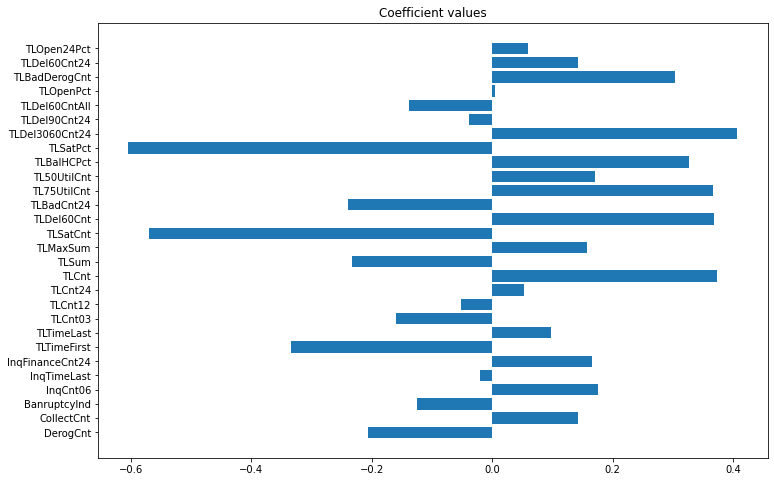

In [33]:
dataset=dataset.drop('TARGET',axis=1)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.barh(dataset.columns,classifier.coef_[0])
plt.title("Coefficient values")
plt.show()

###Training the model using only a subset of the variables

In [34]:
# import the required libraries

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [35]:
# load the dataset
dataset=pd.read_excel("a_Dataset_CreditScoring.xlsx")
dataset=dataset.drop('ID',axis=1)
dataset=dataset.fillna(dataset.mean())
# split into input (X) and target (y) variables
X = dataset.iloc[:, 1:]
y = dataset.iloc[:,0]

In [36]:
# # define the cross-validation evaluation method
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define the pipeline to evaluate
# model = LogisticRegression(max_iter = 1000)
# fs = SelectKBest(score_func = f_classif)
# pipeline = Pipeline(steps=[('anova', fs), ('lr', model)])

In [37]:
# # define the grid to use up to the max no. of features as the `k` value for `SelectKBest`
# grid = {}
# grid['anova__k'] = [i+1 for i in range(X.shape[1])]
# # define the grid search
# search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)

In [38]:
# # perform the search
# results = search.fit(X, y)

In [39]:
# # summarize best score
# print('Best Mean Accuracy: %.3f' % results.best_score_)
# print('Best Config: %s' % results.best_params_)

In [40]:
# print(results)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 22.936401
Feature 1: 30.291134
Feature 2: 2.043279
Feature 3: 35.229959
Feature 4: 5.954665
Feature 5: 51.819063
Feature 6: 11.933909
Feature 7: 2.520529
Feature 8: 1.836017
Feature 9: 0.640659
Feature 10: 0.167704
Feature 11: 3.501258
Feature 12: 0.564587
Feature 13: 4.887096
Feature 14: 12.451317
Feature 15: 92.696063
Feature 16: 60.812333
Feature 17: 22.782480
Feature 18: 13.108066
Feature 19: 73.405931
Feature 20: 169.420556
Feature 21: 126.053573
Feature 22: 111.755260
Feature 23: 108.245028
Feature 24: 13.082205
Feature 25: 127.563399
Feature 26: 162.159061
Feature 27: 1.444843


In [42]:
dataset.head()

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,3,3,0,4,0.0,5,117,27,0,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,15,9,0,3,1.0,3,14,14,0,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,0,0,0,1,5.0,1,354,7,0,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,8,5,0,6,1.0,10,16,4,0,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,3,1,0,9,0.0,8,130,52,0,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [43]:
datanew=dataset.iloc[:, np.r_[0, 20:24,25:27]]
datanew.head()

,TARGET,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLOpenPct,TLBadDerogCnt
0,1,0.9179,0.2083,2,3,0.2083,4
1,1,0.8000,0.0000,0,0,1.0000,12
2,1,0.3552,0.6538,0,1,0.7308,1
3,1,0.9127,0.2500,1,1,0.7500,7
4,1,1.2511,0.0000,0,1,0.1429,3


In [44]:
y = datanew.iloc[:, 0].values
X = datanew.iloc[:, 1:].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier =  LogisticRegression(class_weight = 'balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
predictions = classifier.predict_proba(X_test)

In [46]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

dfx.to_csv("/content/drive/My Drive/g1_Model_Prediction2.csv", sep=',', encoding='UTF-8')

dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.021830,0.978170,1
1,0,0.548330,0.451670,0
2,0,0.317995,0.682005,1
3,0,0.453748,0.546252,1
4,0,0.743812,0.256188,0


In [47]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.7116666666666667
[[359 139]
 [ 34  68]]


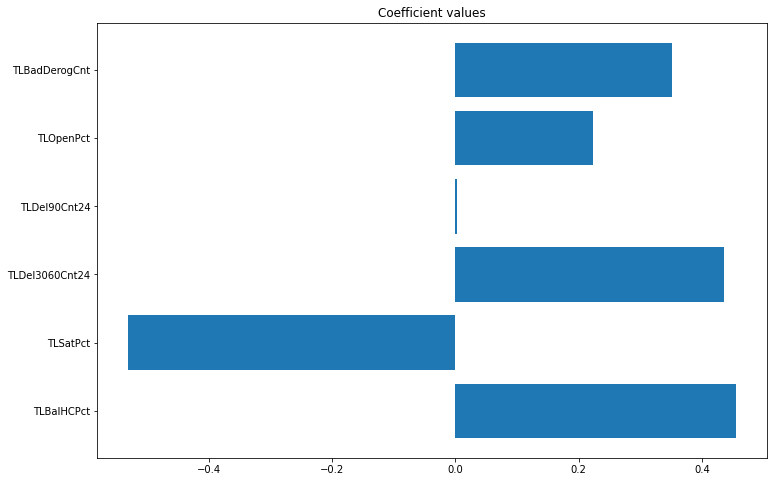

In [48]:
datanew=datanew.drop('TARGET',axis=1)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.barh(datanew.columns,classifier.coef_[0])
plt.title("Coefficient values")
plt.show()

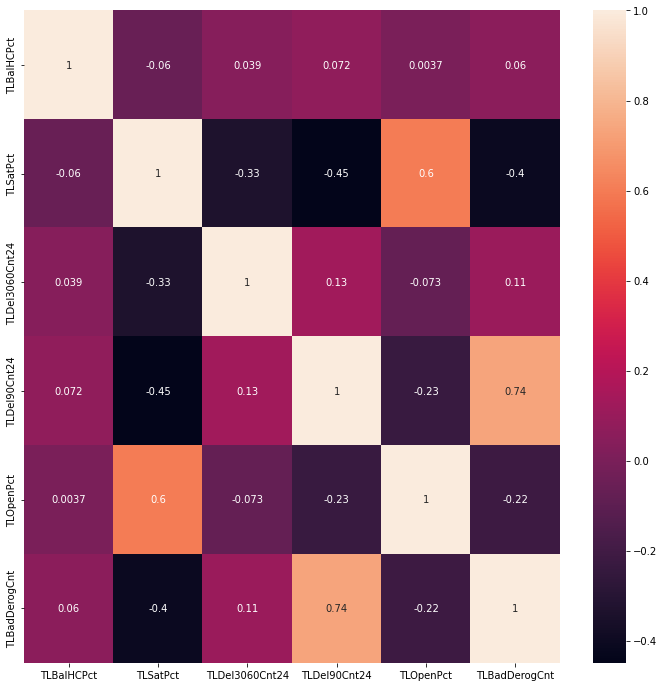

In [53]:
# visualize how the different variables are correlated
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(datanew.corr(), annot=True)